In [ ]:
!pip install vnstock

In [ ]:
import vnstock as vns
import pandas as pd
import datetime as dt
import numpy as np

**Vui lòng chuyển đổi sang Vnstock3** thế hệ mới (0.3.0.7) với câu lệnh: `pip install vnstock3 --upgrade`.
**Từ 1/1/2025, vnstock3 sẽ được cài đặt khi sử dụng cú pháp** `pip install vnstock` **thay cho Vnstock Legacy** hiện tại.
Xem chi tiết [chuyển đổi sang vnstock3](https://vnstocks.com/docs/tai-lieu/migration-chuyen-doi-sang-vnstock3).
Phiên bản **Vnstock Legacy (0.2.9.2.2)** bạn đang sử dụng **sẽ không được nâng cấp thêm.**


In [ ]:
from datetime import datetime

# Lấy ngày hôm nay
today = datetime.today().strftime('%Y-%m-%d')

vcb = vns.stock_historical_data("VCB", "2022-01-01", today)
acb = vns.stock_historical_data("ACB", "2022-01-01", today)
bid = vns.stock_historical_data("BID", "2022-01-01", today)
time = acb['time']
vcb = vcb.drop('time', axis=1)
acb = acb.drop('time', axis=1)
bid = bid.drop('time', axis=1)
vcb = vcb.drop('ticker', axis=1)
acb = acb.drop('ticker', axis=1)
bid = bid.drop('ticker', axis=1)
acb.index = pd.DatetimeIndex(time.values)
vcb.index = pd.DatetimeIndex(time.values)
bid.index = pd.DatetimeIndex(time.values)
list_banks = ['VCB', 'ACB', 'BID']
bank_stocks = pd.DataFrame(index=pd.DatetimeIndex(time.values))
bank_stocks = pd.concat([vcb,acb,bid],axis=1, keys = list_banks)

bank_stocks

VCB                                  ACB                       \
             open   high    low  close   volume   open   high    low  close   
2022-01-04  66890  67230  66050  66890  1133800  19540  19540  19230  19310   
2022-01-05  66890  68080  66050  66050  1603100  19280  19280  18890  18920   
2022-01-06  66550  67650  65960  66980  1215600  18810  19080  18580  18940   
2022-01-07  67400  67650  66220  67570   966200  19030  19060  18690  18690   
2022-01-10  67490  67650  66470  66890   941200  18520  18750  18500  18560   
...           ...    ...    ...    ...      ...    ...    ...    ...    ...   
2024-10-04  92500  92800  92300  92300   859700  25700  25750  25400  25400   
2024-10-07  92300  92500  91800  92000   610700  25500  25700  25350  25450   
2024-10-08  92000  92000  91000  91500  1123100  25500  25650  25350  25500   
2024-10-09  91300  91800  90900  91000  2175700  25600  26250  25550  26250   
2024-10-10  92300  93000  91200  91900  1325200  26400  26500  26050  26200   

                        BID                                
              volume   open   high    low  close   volume  
2022-01-04   4555000  33370  33720  33060  33190  1769200  
2022-01-05   5934500  33630  33630  32740  32880  1922200  
2022-01-06   5673600  32390  34430  32170  33720  5998800  
2022-01-07   3323800  34300  35010  33410  34790  4367700  
2022-01-10   5171800  34790  35760  34430  34610  2951600  
...              ...    ...    ...    ...    ...      ...  
2024-10-04   8664100  49500  49600  49150  49200  2164800  
2024-10-07   6769700  49500  49500  49000  49050  1492500  
2024-10-08   6522700  49050  49350  48800  48900  1900100  
2024-10-09  20003200  49200  49600  48800  49450  2190900  
2024-10-10   9079400  49950  49950  49400  49750  2650400  

[691 rows x 15 columns]

In [ ]:
value_banks = pd.DataFrame()
for name in list_banks:
    value_banks[name] = bank_stocks[name]['close'].pct_change()*100

value_banks.head(20)

,VCB,ACB,BID
2022-01-04,NaN,NaN,NaN
2022-01-05,-1.255793,-2.019679,-0.934016
2022-01-06,1.408024,0.105708,2.554745
2022-01-07,0.880860,-1.319958,3.173191
2022-01-10,-1.006364,-0.695559,-0.517390
2022-01-11,0.508297,-0.915948,1.011268
2022-01-12,0.758590,1.033170,6.979405
2022-01-13,2.376735,0.753498,4.411765
2022-01-14,1.831291,-0.854701,0.563380
2022-01-17,3.355990,-0.915948,-1.375095


In [ ]:
value_banks.describe()

,VCB,ACB,BID
count,614.000000,614.000000,614.000000
mean,0.052058,0.051112,0.073777
std,1.556551,1.733634,2.200876
min,-5.877449,-6.766382,-6.967985
25%,-0.790321,-0.805527,-1.010814
50%,0.000000,0.000000,0.000000
75%,0.834113,0.769146,1.174273
max,6.915477,6.840391,7.000350


In [ ]:
import scipy.stats as st
for sym in list_banks:
  rt = value_banks[sym].dropna()
  interval = st.t.interval(confidence=0.95, df=value_banks.shape[0]-1,
                loc=np.mean(rt),
                scale=st.sem(rt))
  print('95% confidence interval of {} is {}'.format(sym, interval))

95% confidence interval of VCB is (-0.07130436361709933, 0.17542123316713537)
95% confidence interval of ACB is (-0.08628496113710045, 0.18850974881431948)
95% confidence interval of BID is (-0.10065123676320034, 0.24820490711505291)


In [ ]:
value_banks.nunique()

VCB    549
ACB    525
BID    560
dtype: int64

In [ ]:
value_banks.duplicated().sum()

0

In [ ]:
value_banks.isnull().values.sum()

3

In [ ]:
value_banks = value_banks.dropna()
value_banks

,VCB,ACB,BID
2022-01-05,-1.255793,-2.019679,-0.934016
2022-01-06,1.408024,0.105708,2.554745
2022-01-07,0.880860,-1.319958,3.173191
2022-01-10,-1.006364,-0.695559,-0.517390
2022-01-11,0.508297,-0.915948,1.011268
...,...,...,...
2024-06-18,0.000000,0.000000,0.000000
2024-06-19,-0.574053,0.407332,-0.860215
2024-06-20,-0.692841,0.608519,-1.301518
2024-06-21,0.000000,-1.008065,0.219780


In [ ]:
value_banks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 614 entries, 2022-01-05 to 2024-06-24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VCB     614 non-null    float64
 1   ACB     614 non-null    float64
 2   BID     614 non-null    float64
dtypes: float64(3)
memory usage: 19.2 KB


In [ ]:
!pip install cufflinks
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.7 MB/s eta 0:00:00


In [ ]:
import cufflinks as cf
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "colab"
import matplotlib.pyplot as plt

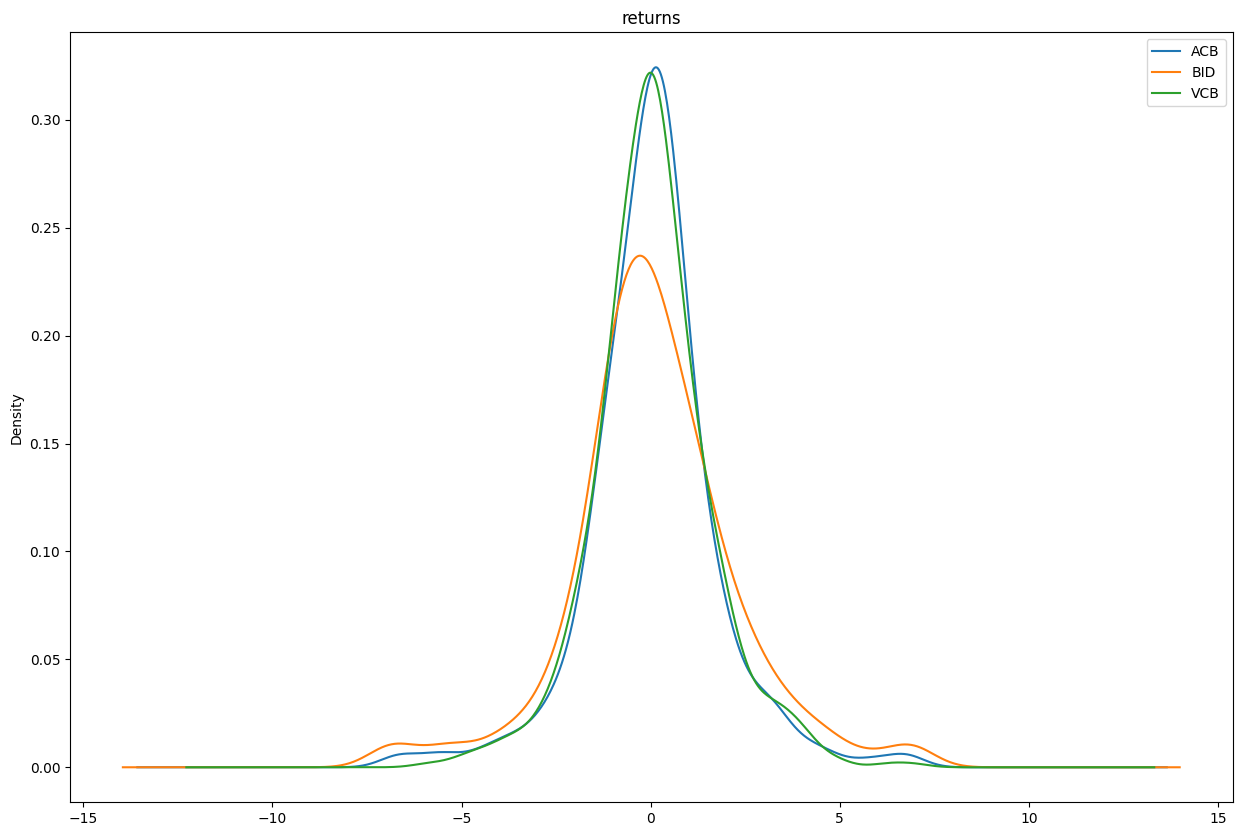

In [ ]:
value_banks['ACB'].plot(kind='kde', label='ACB', figsize=(15,10), title='returns')
value_banks['BID'].plot(kind='kde', label='BID')
value_banks['VCB'].plot(kind='kde', label='VCB')
plt.legend()

In [ ]:
value_banks.std()

VCB    1.556551
ACB    1.733634
BID    2.200876
dtype: float64

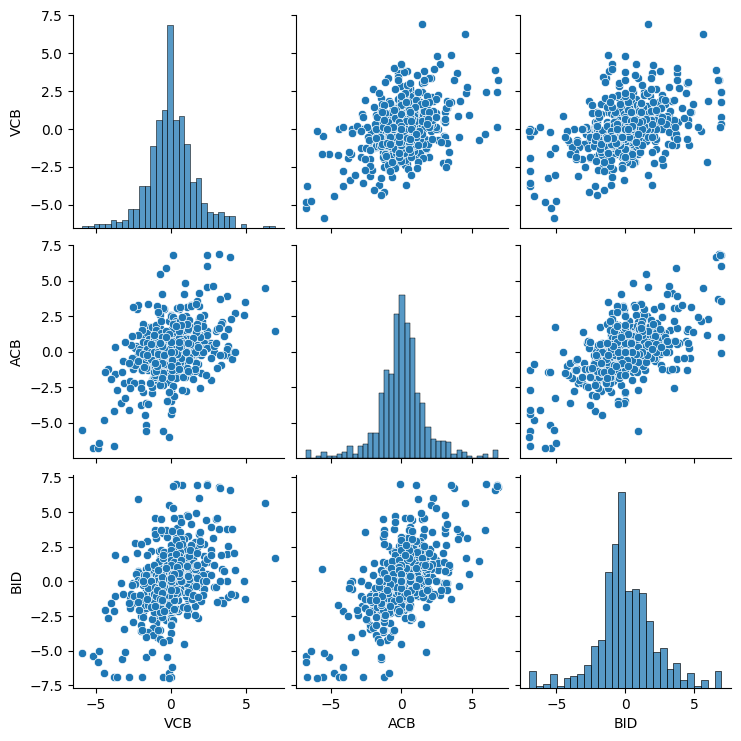

In [ ]:
import seaborn as sns
sns.pairplot(value_banks)

Hệ số tương quan giữa phần trăm tỉ suất lọi nhuận cổ phiếu trong ngày

Hệ số tương quan giữa giá trị cổ phiếu của các ngân hàng

In [ ]:
value_banks.corr()

,VCB,ACB,BID
VCB,1.000000,0.439232,0.431032
ACB,0.439232,1.000000,0.608433
BID,0.431032,0.608433,1.000000


In [ ]:
close = pd.DataFrame()
close['VCB'] = bank_stocks['VCB']['close']
close['ACB'] = bank_stocks['ACB']['close']
close['BID'] = bank_stocks['BID']['close']

close.corr()

,VCB,ACB,BID
VCB,1.000000,0.793485,0.873142
ACB,0.793485,1.000000,0.887369
BID,0.873142,0.887369,1.000000


In [ ]:
close.iplot(title = "Giá đóng cửa", xTitle = "Năm", yTitle = "Giá")

Biểu đố nhiệt thể hiện hệ số tương quan giữa giá trị cổ phiếu của các ngân hàng

<Axes: >

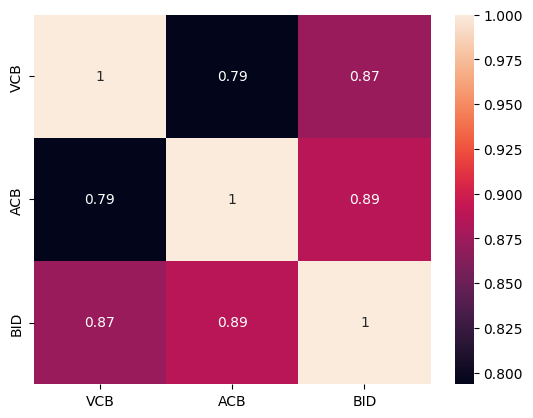

In [ ]:
sns.heatmap(close.corr(), annot=True)

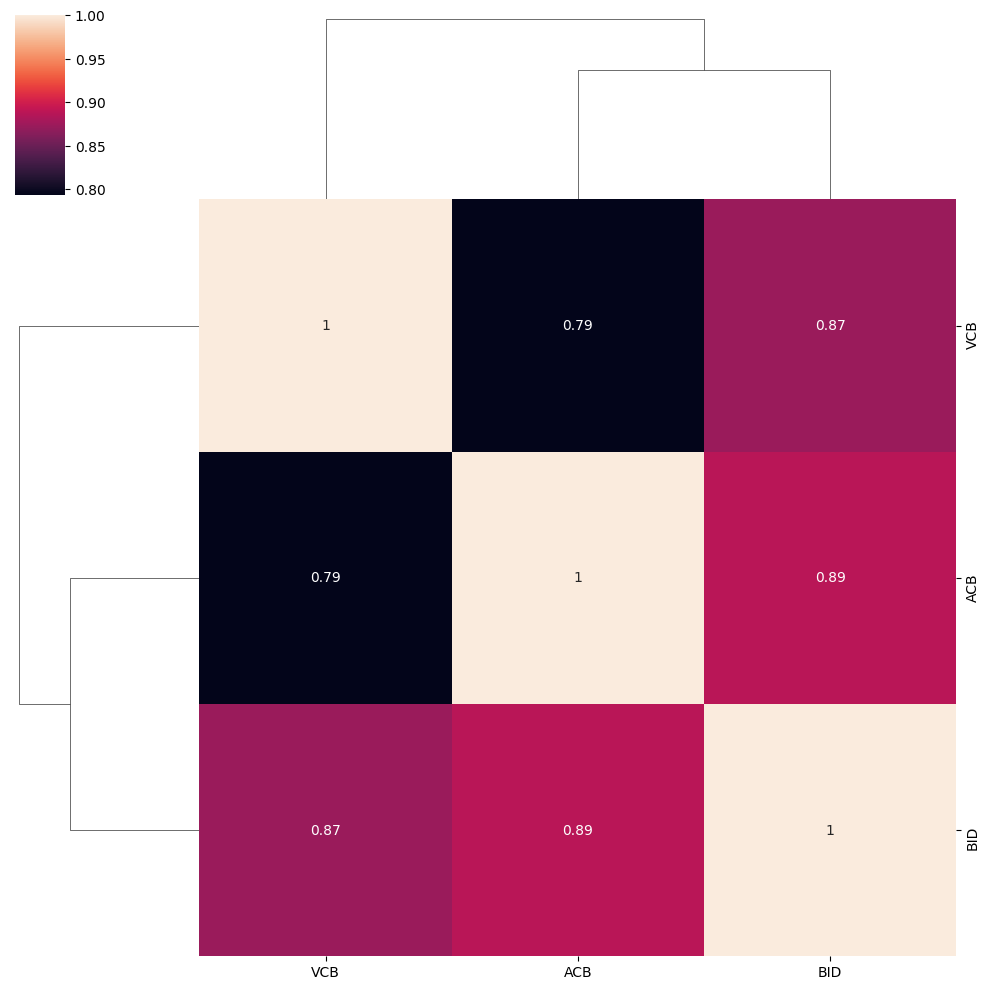

In [ ]:
sns.clustermap(close.corr(), annot=True)

In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 789.4 kB/s eta 0:00:00


    + Đường trung bình động, thể hiện biến động, chỉ báo xu hướng của giá cổ phiếu trong một khoảng thời gian

    + Mục đích: theo dõi giá đang vận động theo xu hướng tăng hoặc giảm hay không có xu hướng

In [ ]:
close['ACB'].ta_plot(study='sma',periods=30,title='SMA ACB')
close['VCB'].ta_plot(study='sma',periods=30,title='SMA VCB')
close['BID'].ta_plot(study='sma',periods=30,title='SMA BID')

Bollinger Band là chỉ báo được kết hợp bởi đường trung bình MA với độ lệch chuẩn. Chỉ báo này được cấu tạo bởi 3 thành phần chính:

  -Dải trên (Upper Band): là dải giữa cộng với 2 độ lệch chuẩn.

  -Dải giữa (Middle Band): là đường trung bình động SMA 20.

  -Dải dưới (Lower Band): là dải giữa trừ đi 2 độ lệch chuẩn.

In [ ]:
close['ACB'].ta_plot(study='boll')
close['VCB'].ta_plot(study='boll')
close['BID'].ta_plot(study='boll')

Train model

In [ ]:
data = vcb['close']
data

2022-01-04    66890
2022-01-05    66050
2022-01-06    66980
2022-01-07    67570
2022-01-10    66890
              ...  
2024-06-18    87100
2024-06-19    86600
2024-06-20    86000
2024-06-21    86000
2024-06-24    85500
Name: close, Length: 615, dtype: int64

In [ ]:
dataset = data.values
dataset

array([66890, 66050, 66980, 67570, 66890, 67230, 67740, 69350, 70620,
       72990, 74170, 73500, 73750, 75530, 78750, 81120, 80020, 77050,
       75360, 78240, 77900, 76880, 77310, 76210, 72820, 73670, 73670,
       74090, 73840, 74010, 73500, 73580, 72230, 72060, 71550, 71970,
       71970, 72400, 71890, 71890, 69010, 70280, 70700, 70960, 71300,
       68670, 69860, 70280, 71300, 71890, 71890, 71890, 70700, 69860,
       69770, 69350, 69430, 69520, 70110, 69940, 70280, 71630, 70280,
       70280, 69770, 69770, 68590, 67910, 65790, 65790, 66380, 66380,
       69600, 69260, 68160, 69010, 69010, 68500, 67650, 68590, 67230,
       65960, 67740, 67740, 65200, 61810, 62830, 64349, 63840, 64349,
       63760, 63000, 64010, 65200, 64940, 65540, 66050, 66810, 68160,
       66890, 65620, 67490, 68590, 67060, 65880, 65790, 64690, 65200,
       64780, 66980, 64440, 64349, 65790, 64349, 64269, 63510, 63420,
       64610, 63930, 63340, 62660, 62740, 62660, 61640, 63930, 62660,
       60970, 60880,

In [ ]:
training_data_len = int(np.ceil(len(dataset) * .80 ))
print("{},{}".format(len(data), training_data_len))

615,492


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset.reshape(-1,1))
scaled_data

array([[0.32048998],
       [0.30178174],
       [0.32249443],
       [0.33563474],
       [0.32048998],
       [0.32806236],
       [0.33942094],
       [0.3752784 ],
       [0.40356347],
       [0.45634744],
       [0.48262806],
       [0.46770601],
       [0.47327394],
       [0.51291759],
       [0.58463252],
       [0.63741648],
       [0.61291759],
       [0.5467706 ],
       [0.5091314 ],
       [0.57327394],
       [0.56570156],
       [0.54298441],
       [0.55256125],
       [0.52806236],
       [0.45256125],
       [0.4714922 ],
       [0.4714922 ],
       [0.48084633],
       [0.4752784 ],
       [0.47906459],
       [0.46770601],
       [0.46948775],
       [0.43942094],
       [0.43563474],
       [0.42427617],
       [0.43363029],
       [0.43363029],
       [0.44320713],
       [0.43184855],
       [0.43184855],
       [0.36770601],
       [0.39599109],
       [0.40534521],
       [0.41113586],
       [0.41870824],
       [0.36013363],
       [0.38663697],
       [0.395

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 50:, :]
def get_data():
    x_train, y_train, x_test, y_test = [], [], [], scaled_data[training_data_len:, :]
    for i in range(50, len(train_data)):
        x_train.append(train_data[i-50:i, :])
        y_train.append(train_data[i, :])

    [x_test.append(test_data[i-50:i, :]) for i in range(50, len(test_data))]

    x_train, y_train, x_test = np.array(x_train), np.array(y_train), np.array(x_test)

    return x_train, y_train, x_test, y_test

print('Train_data: {} \n Test_data:{}'.format(train_data.shape,test_data.shape))

Train_data: (492, 1) 
 Test_data:(173, 1)


Xây dựng mô hình

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional

Mô hình LSTM

In [ ]:
def get_model(x_train, y_train):
    inputs = keras.layers.Input((x_train.shape[1], 1), name='input')

    x = keras.layers.LSTM(128, return_sequences=True)(inputs)
    x = keras.layers.LSTM(64)(x)
    x = keras.layers.Dropout(0.25)(x)
    x = keras.layers.Dense(25)(x)
    x = keras.layers.Dropout(0.25)(x)

    outputs = keras.layers.Dense(1)(x)
    model = keras.Model(inputs = inputs, outputs = outputs)

    return model

Mô hình Bidirectional LSTM

In [ ]:
def get_model_Bidirectional(x_train, y_train):
    inputs = keras.layers.Input((x_train.shape[1], 1), name='input')

    x = keras.layers.Bidirectional(LSTM(128, return_sequences=True))(inputs)
    x = keras.layers.Bidirectional(LSTM(64))(x)
    x = keras.layers.Dropout(0.25)(x)
    x = keras.layers.Dense(64)(x)
    x = keras.layers.Dropout(0.25)(x)
    x = keras.layers.Dense(32, activation="relu")(x)

    outputs = keras.layers.Dense(1)(x)
    model = keras.Model(inputs = inputs, outputs = outputs)

    return model

In [ ]:
x_train, y_train, x_test, y_test = get_data()

In [ ]:
x_train.shape

(442, 50, 1)

In [ ]:
model = get_model(x_train, y_train)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 50, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 50, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 26    

In [ ]:
model_bi = get_model_Bidirectional(x_train, y_train)
model_bi.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 50, 1)]           0         
                                                                 
 bidirectional (Bidirection  (None, 50, 256)           133120    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0   

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='mse',metrics='mse')
model.fit(x_train, y_train, batch_size=16, epochs=20)

Epoch 1/20
28/28 [==============================] - 11s 59ms/step - loss: 0.0459 - mse: 0.0459
Epoch 2/20
28/28 [==============================] - 2s 60ms/step - loss: 0.0134 - mse: 0.0134
Epoch 3/20
28/28 [==============================] - 2s 59ms/step - loss: 0.0117 - mse: 0.0117
Epoch 4/20
28/28 [==============================] - 2s 59ms/step - loss: 0.0098 - mse: 0.0098
Epoch 5/20
28/28 [==============================] - 3s 95ms/step - loss: 0.0101 - mse: 0.0101
Epoch 6/20
28/28 [==============================] - 4s 132ms/step - loss: 0.0101 - mse: 0.0101
Epoch 7/20
28/28 [==============================] - 3s 121ms/step - loss: 0.0092 - mse: 0.0092
Epoch 8/20
28/28 [==============================] - 3s 115ms/step - loss: 0.0080 - mse: 0.0080
Epoch 9/20
28/28 [==============================] - 4s 139ms/step - loss: 0.0086 - mse: 0.0086
Epoch 10/20
28/28 [==============================] - 4s 148ms/step - loss: 0.0077 - mse: 0.0077
Epoch 11/20
28/28 [==============================] - 

In [ ]:
model_bi.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='mse',metrics='mse')
model_bi.fit(x_train, y_train, batch_size=16, epochs=20)

Epoch 1/20
28/28 [==============================] - 11s 103ms/step - loss: 0.0477 - mse: 0.0477
Epoch 2/20
28/28 [==============================] - 3s 101ms/step - loss: 0.0149 - mse: 0.0149
Epoch 3/20
28/28 [==============================] - 3s 103ms/step - loss: 0.0085 - mse: 0.0085
Epoch 4/20
28/28 [==============================] - 4s 153ms/step - loss: 0.0078 - mse: 0.0078
Epoch 5/20
28/28 [==============================] - 3s 104ms/step - loss: 0.0066 - mse: 0.0066
Epoch 6/20
28/28 [==============================] - 3s 102ms/step - loss: 0.0064 - mse: 0.0064
Epoch 7/20
28/28 [==============================] - 3s 103ms/step - loss: 0.0054 - mse: 0.0054
Epoch 8/20
28/28 [==============================] - 4s 137ms/step - loss: 0.0072 - mse: 0.0072
Epoch 9/20
28/28 [==============================] - 3s 122ms/step - loss: 0.0058 - mse: 0.0058
Epoch 10/20
28/28 [==============================] - 3s 102ms/step - loss: 0.0054 - mse: 0.0054
Epoch 11/20
28/28 [=============================

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 1s 33ms/step


2585.565488188415

In [ ]:
predictions_bi = model_bi.predict(x_test)
predictions_bi = scaler.inverse_transform(predictions_bi)
y_test = scaler.inverse_transform(y_test)
rmse = np.sqrt(np.mean(((predictions_bi - y_test) ** 2)))
rmse

4/4 [==============================] - 2s 104ms/step


4079818499.8656716

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print(r2_score(y_test, predictions))
print(mean_absolute_error(y_test, predictions))
print(mean_absolute_percentage_error(y_test, predictions))

0.5090984695067473
2056.8615980691056
0.02244640487210614


In [ ]:
predictions

array([[81395.586],
       [80915.38 ],
       [80522.77 ],
       [80325.   ],
       [80375.51 ],
       [80562.23 ],
       [80822.64 ],
       [80833.63 ],
       [81032.47 ],
       [81426.66 ],
       [82043.73 ],
       [82756.66 ],
       [83508.875],
       [84302.81 ],
       [85208.984],
       [86053.52 ],
       [86697.08 ],
       [87281.15 ],
       [87757.016],
       [88206.14 ],
       [88604.72 ],
       [89084.336],
       [89488.82 ],
       [89746.71 ],
       [89842.01 ],
       [89816.04 ],
       [89825.164],
       [89766.3  ],
       [89652.68 ],
       [89251.89 ],
       [88866.086],
       [88584.32 ],
       [88366.15 ],
       [88159.77 ],
       [88039.12 ],
       [87973.57 ],
       [87918.12 ],
       [87940.375],
       [88124.27 ],
       [88373.41 ],
       [88452.64 ],
       [88358.555],
       [88234.805],
       [88276.98 ],
       [89085.29 ],
       [90244.945],
       [91482.83 ],
       [92482.125],
       [93167.17 ],
       [93591.98 ],


In [ ]:
l1_train = data[:training_data_len]
l2_valid = data[training_data_len:]
predictions_series = pd.Series(predictions.reshape(predictions.shape[0]), index=l2_valid.index, name='Predictions')
l2_valid = pd.concat([l2_valid, predictions_series], axis=1)

In [ ]:
l2_valid

,close,Predictions
2023-12-21,80900,81395.585938
2023-12-22,80900,80915.382812
2023-12-25,81800,80522.773438
2023-12-26,82800,80325.000000
2023-12-27,82700,80375.507812
...,...,...
2024-06-18,87100,86351.375000
2024-06-19,86600,86185.734375
2024-06-20,86000,85968.117188
2024-06-21,86000,85681.148438


In [ ]:
import matplotlib.pyplot as plt

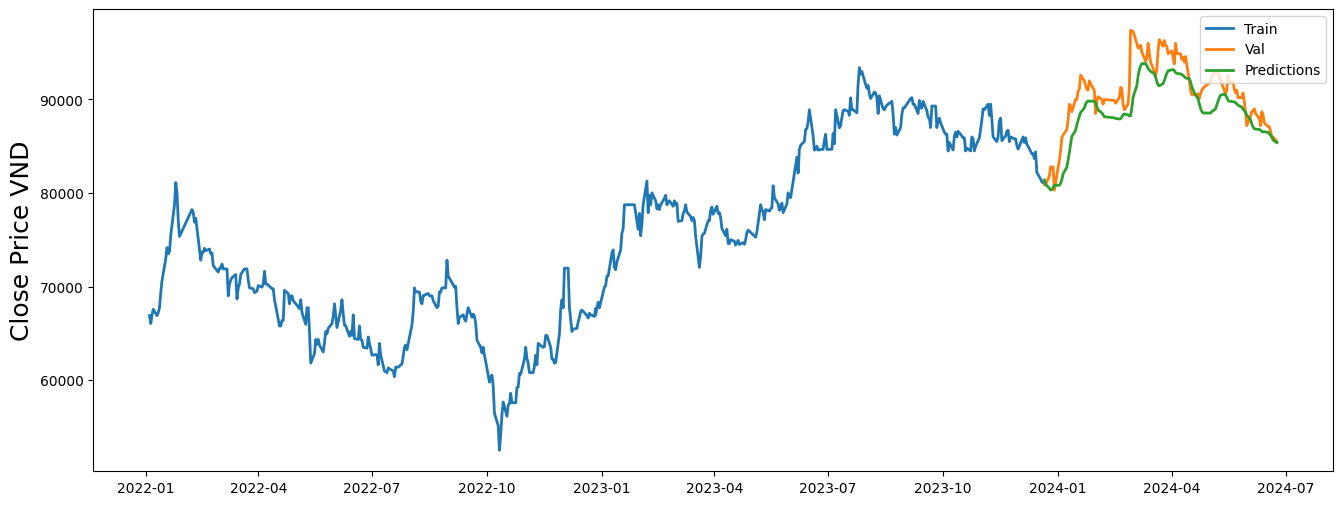

In [ ]:
def get_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(16,6))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('Close Price VND', fontsize=18)
    ax.set_title(title)
    ax.legend(['Train', 'Val', 'Predictions'], loc='upper right')

get_plot(l1_train, l2_valid)

In [ ]:
real_data = [test_data[len(test_data) + 1 - 90: len(test_data), :]]
real_data = np.array(real_data)
real_data.shape

(1, 89, 1)

In [ ]:
next_pred = model.predict(real_data)
next_pred = scaler.inverse_transform(next_pred)
print("Pred next day: {}".format(next_pred))

1/1 [==============================] - 1s 1s/step
Pred next day: [[85066.766]]
